In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,f1_score,recall_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error

In [2]:
columns = ["Time","V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28","Amount","Class"]
fraud = pd.read_csv('creditcard.csv', header=None, names=columns)
fraud.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1,0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,...,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62,0
2,0,1.19185711131486,0.26615071205963,0.16648011335321,0.448154078460911,0.0600176492822243,-0.0823608088155687,-0.0788029833323113,0.0851016549148104,-0.255425128109186,...,-0.225775248033138,-0.638671952771851,0.101288021253234,-0.339846475529127,0.167170404418143,0.125894532368176,-0.00898309914322813,0.0147241691924927,2.69,0
3,1,-1.35835406159823,-1.34016307473609,1.77320934263119,0.379779593034328,-0.503198133318193,1.80049938079263,0.791460956450422,0.247675786588991,-1.51465432260583,...,0.247998153469754,0.771679401917229,0.909412262347719,-0.689280956490685,-0.327641833735251,-0.139096571514147,-0.0553527940384261,-0.0597518405929204,378.66,0
4,1,-0.966271711572087,-0.185226008082898,1.79299333957872,-0.863291275036453,-0.0103088796030823,1.24720316752486,0.23760893977178,0.377435874652262,-1.38702406270197,...,-0.108300452035545,0.00527359678253453,-0.190320518742841,-1.17557533186321,0.647376034602038,-0.221928844458407,0.0627228487293033,0.0614576285006353,123.5,0


In [3]:
fraud.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284803,172786,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.01448,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284804,172787,-0.732789,-0.05508,2.03503,-0.738589,0.868229,1.058415,0.02433,0.294869,0.5848,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284805,172788,1.919565,-0.301254,-3.24964,-0.557828,2.630515,3.03126,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284806,172788,-0.24044,0.530483,0.70251,0.689799,-0.377961,0.623708,-0.68618,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.0,0
284807,172792,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.41465,0.48618,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.0,0


In [4]:
fraud.duplicated().sum()

1081

In [5]:
fraud.drop_duplicates(keep=False, inplace=True)

In [6]:
fraud.duplicated().sum()

0

In [7]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282954 entries, 0 to 284807
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Time    282954 non-null  object
 1   V1      282954 non-null  object
 2   V2      282954 non-null  object
 3   V3      282954 non-null  object
 4   V4      282954 non-null  object
 5   V5      282954 non-null  object
 6   V6      282954 non-null  object
 7   V7      282954 non-null  object
 8   V8      282954 non-null  object
 9   V9      282954 non-null  object
 10  V10     282954 non-null  object
 11  V11     282954 non-null  object
 12  V12     282954 non-null  object
 13  V13     282954 non-null  object
 14  V14     282954 non-null  object
 15  V15     282954 non-null  object
 16  V16     282954 non-null  object
 17  V17     282954 non-null  object
 18  V18     282954 non-null  object
 19  V19     282954 non-null  object
 20  V20     282954 non-null  object
 21  V21     282954 non-null  object
 

In [8]:
fraud['Time'] = pd.to_numeric(fraud['Time'],errors = 'coerce')
fraud['V1'] = pd.to_numeric(fraud['V1'],errors = 'coerce')
fraud['V2'] = pd.to_numeric(fraud['V2'],errors = 'coerce')
fraud['V3'] = pd.to_numeric(fraud['V3'],errors = 'coerce')
fraud['V4'] = pd.to_numeric(fraud['V4'],errors = 'coerce')
fraud['V5'] = pd.to_numeric(fraud['V5'],errors = 'coerce')
fraud['V6'] = pd.to_numeric(fraud['V6'],errors = 'coerce')
fraud['V7'] = pd.to_numeric(fraud['V7'],errors = 'coerce')
fraud['V8'] = pd.to_numeric(fraud['V8'],errors = 'coerce')
fraud['V9'] = pd.to_numeric(fraud['V9'],errors = 'coerce')
fraud['V10'] = pd.to_numeric(fraud['V10'],errors = 'coerce')
fraud['V11'] = pd.to_numeric(fraud['V11'],errors = 'coerce')
fraud['V12'] = pd.to_numeric(fraud['V12'],errors = 'coerce')
fraud['V13'] = pd.to_numeric(fraud['V13'],errors = 'coerce')
fraud['V14'] = pd.to_numeric(fraud['V14'],errors = 'coerce')
fraud['V15'] = pd.to_numeric(fraud['V15'],errors = 'coerce')
fraud['V16'] = pd.to_numeric(fraud['V16'],errors = 'coerce')
fraud['V17'] = pd.to_numeric(fraud['V17'],errors = 'coerce')
fraud['V18'] = pd.to_numeric(fraud['V18'],errors = 'coerce')
fraud['V19'] = pd.to_numeric(fraud['V19'],errors = 'coerce')
fraud['V20'] = pd.to_numeric(fraud['V20'],errors = 'coerce')
fraud['V21'] = pd.to_numeric(fraud['V21'],errors = 'coerce')
fraud['V22'] = pd.to_numeric(fraud['V22'],errors = 'coerce')
fraud['V23'] = pd.to_numeric(fraud['V23'],errors = 'coerce')
fraud['V24'] = pd.to_numeric(fraud['V24'],errors = 'coerce')
fraud['V25'] = pd.to_numeric(fraud['V25'],errors = 'coerce')
fraud['V26'] = pd.to_numeric(fraud['V26'],errors = 'coerce')
fraud['V27'] = pd.to_numeric(fraud['V27'],errors = 'coerce')
fraud['V28'] = pd.to_numeric(fraud['V28'],errors = 'coerce')
fraud['Amount'] = pd.to_numeric(fraud['Amount'],errors = 'coerce')
fraud['Class'] = pd.to_numeric(fraud['Class'],errors = 'coerce')
print(fraud.dtypes)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object


In [9]:
fraud.iloc[:,:-1].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,...,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000
mean,94816.256714,0.010161,-0.006837,0.002906,-0.004665,0.003311,-0.001734,0.002985,-0.002038,-0.002651,...,0.000470,-0.000316,0.000184,0.000332,0.000372,-0.000347,0.000317,0.002830,0.000740,88.534756
std,47479.631543,1.940990,1.643708,1.504189,1.413356,1.374938,1.331984,1.223249,1.173378,1.094047,...,0.769357,0.721104,0.724223,0.623093,0.605599,0.521199,0.481876,0.391139,0.327223,250.567570
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000
25%,54213.000000,-0.912989,-0.601721,-0.888987,-0.851101,-0.688407,-0.769506,-0.551470,-0.209036,-0.645213,...,-0.211207,-0.228236,-0.542743,-0.161658,-0.354423,-0.317659,-0.326567,-0.070453,-0.052736,5.590000
50%,84704.000000,0.022459,0.062929,0.180273,-0.023625,-0.052817,-0.275914,0.041333,0.021522,-0.052847,...,-0.062201,-0.029370,0.007041,-0.011184,0.041074,0.016162,-0.052152,0.001564,0.011312,22.000000
75%,139294.000000,1.316582,0.797751,1.027190,0.737319,0.612704,0.395220,0.570666,0.324281,0.594912,...,0.133435,0.186184,0.528316,0.147729,0.439880,0.350621,0.239885,0.091310,0.078270,77.710000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,39.420904,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000


In [10]:
fraud.isnull().sum()

Time      1
V1        1
V2        1
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [11]:
fraud[:] = np.nan_to_num(fraud)
fraud.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<AxesSubplot:>

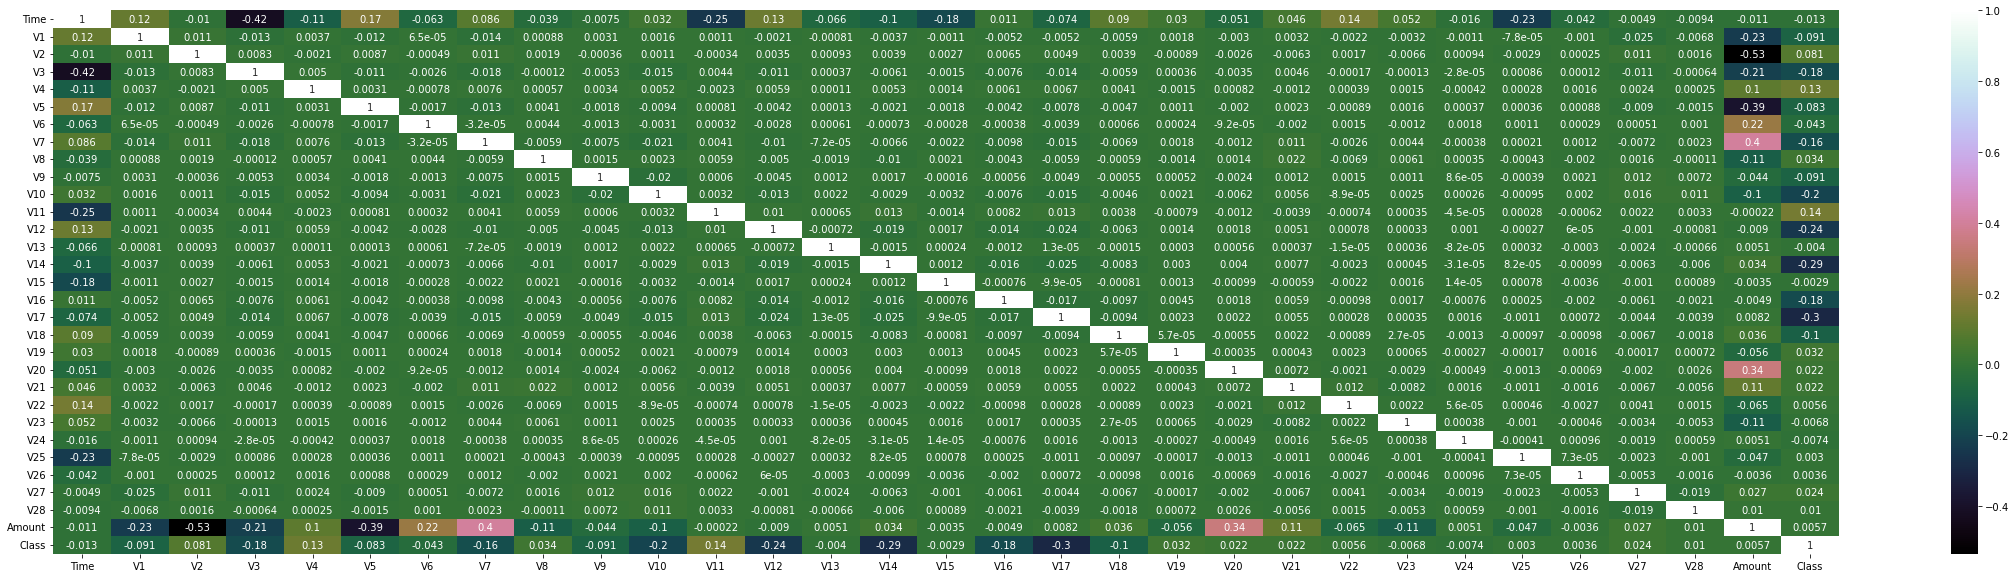

In [12]:
import matplotlib
plt.figure(figsize=(40,10))
sns.heatmap(fraud.corr(),annot=True,cmap='cubehelix')

In [13]:
fraud['Class'].value_counts()

0.0    282494
1.0       460
Name: Class, dtype: int64

This shows the dataset is very unbalanced

<AxesSubplot:xlabel='Class', ylabel='count'>

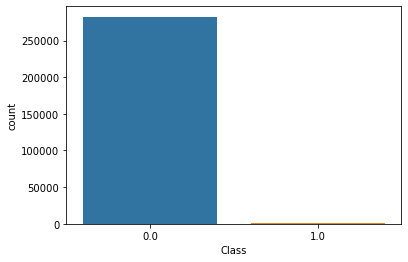

In [14]:
sns.countplot(x='Class', data=fraud)

In [15]:
rob_scaler = RobustScaler()
fraud['Amount'] = rob_scaler.fit_transform(fraud['Amount'].values.reshape(-1,1))
fraud['Time'] = rob_scaler.fit_transform(fraud['Time'].values.reshape(-1,1))
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.995563,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.305047,0.0
1,-0.995563,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.769551,0.0
2,-0.995563,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.267748,0.0
3,-0.995551,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.945369,0.0
4,-0.995551,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.407377,0.0


In [16]:
x = fraud.drop("Class", axis=1)
y = fraud["Class"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=2)

In [17]:
model = LogisticRegression(random_state=2)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9994168684066371


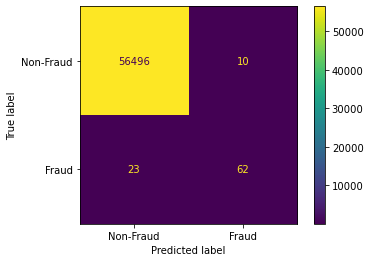

In [18]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred=y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Non-Fraud', 'Fraud'])

cm_display.plot()
plt.show()

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56506
         1.0       0.86      0.73      0.79        85

    accuracy                           1.00     56591
   macro avg       0.93      0.86      0.89     56591
weighted avg       1.00      1.00      1.00     56591



In [20]:
#number of classes in training set before using SMOTE
y_train.value_counts()

0.0    225988
1.0       375
Name: Class, dtype: int64

In [21]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_smote, y_smote = oversample.fit_resample(x_train, y_train)

In [22]:
y_smote.value_counts()

0.0    225988
1.0    225988
Name: Class, dtype: int64

In [25]:
model.fit(x_smote, y_smote)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9708787616405435


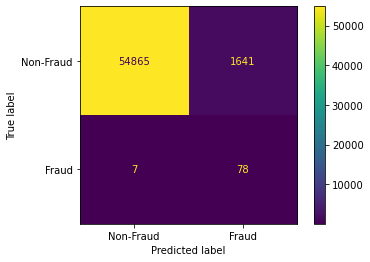

In [26]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred=y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Non-Fraud', 'Fraud'])

cm_display.plot()
plt.show()

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99     56506
         1.0       0.05      0.92      0.09        85

    accuracy                           0.97     56591
   macro avg       0.52      0.94      0.54     56591
weighted avg       1.00      0.97      0.98     56591



In [28]:
# Number of classes in the training set before random undersampling
y_train.value_counts()

0.0    225988
1.0       375
Name: Class, dtype: int64

In [31]:
from imblearn.under_sampling import RandomUnderSampler

ranUnsamp = RandomUnderSampler()
x_ranUnsamp, y_ranUnsamp = ranUnsamp.fit_resample(x_train, y_train)

In [32]:
y_ranUnsamp.value_counts()

0.0    375
1.0    375
Name: Class, dtype: int64

In [33]:
model.fit(x_ranUnsamp, y_ranUnsamp)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9623084942835434


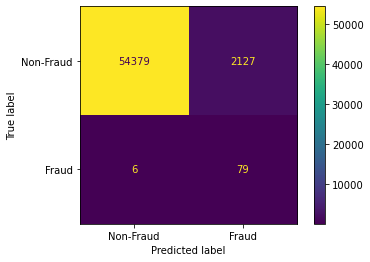

In [34]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred=y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Non-Fraud', 'Fraud'])

cm_display.plot()
plt.show()

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98     56506
         1.0       0.04      0.93      0.07        85

    accuracy                           0.96     56591
   macro avg       0.52      0.95      0.52     56591
weighted avg       1.00      0.96      0.98     56591

